# **Guided Lab 343.4.5 - Pandas Aggregate Functions**

## **Lab Overview**
In this lab, we will use pandas aggregation methods — such as count(), sum(), min(), max(), etc.— and the pandas groupby() function. These are very commonly used methods in data science and data engineering projects.

## **Learning Outcomes**

By the end of this lab learners wil be able to use Pandas Aggregate Functions.
---


## **Instructions:**

In this lab, we will utilize the dummy zoo dataset.

**Step 1:** Let’s start with our “zoo” dataset! [Click here to download zoo.csv](https://drive.google.com/file/d/14TYsLvJlUbQK1hpvg2HNu0p1ybvomIcW/view).

**Step 2:** Use the code below to explore the dataset.


In [1]:
import pandas as pd
import numpy as np

In [2]:
# –» Read the zoo.csv file into a DataFrame called zoo.
# do not forget to update the file path as per your system.
zoo = pd.read_csv('./Data/zoo.csv', delimiter = ',')
zoo


,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320
5,tiger,1006,330
6,tiger,1007,290
7,tiger,1008,310
8,zebra,1009,200
9,zebra,1010,220


To learn the basic pandas aggregation methods, we will perform the following five operations on the dataset:
- Determine the total number of rows, representing the number of animals in the zoo.
- Calculate the cumulative water requirements for all animals.
- Identify the minimum water requirement value.
- Determine the maximum water requirement value.
- Eventually, we will discover the average water_need!


**Example 1 - Pandas count()**

The most basic aggregation method is counting. Counting the number of the animals is as easy as applying a count pandas function on the whole zoo dataframe:





In [5]:
zoo.count()

animal        22
uniq_id       22
water_need    22
dtype: int64

That’s interesting. “What are all of these lines?” – you might ask.

Actually, the pandas .count() function counts the number of values in each column. In the case of the zoo dataset, there were three columns, and each column had 22 values in it.

If you want to make your output clearer, you can select the animal column first by using one of the selection operators (that we learned about in the previous article):





In [6]:
zoo[['animal']].count()

animal    22
dtype: int64

Or in this particular case, the result could be even nicer if you use this syntax:




In [7]:
zoo.animal.count()

np.int64(22)

This also selects only one column, but it turns our pandas dataframe object into a pandas series object. And the count function will be applied to that. (Which means that the output format is slightly different.)





**Example 2 - sum() in Pandas**

Following the same logic, you can easily sum the values in the water_need column by typing:

In [8]:
zoo.water_need.sum()


np.int64(7650)

Just out of curiosity, let’s run our .sum() function on all columns, as well:




In [9]:
zoo.sum()

animal        elephantelephantelephanttigertigertigertigerti...
uniq_id                                                   22253
water_need                                                 7650
dtype: object

**Note:** .sum() function turns the words of the animal column into one string of animal names. (, it is very much in line with the logic of Python.)

**Example 3 - Pandas Data Aggregation #3 and #4: min() and max()**

How to make pandas return the smallest value from the water_need column?



In [10]:
zoo.water_need.min()


np.int64(80)

And getting the max value works pretty similarly:




In [11]:
zoo.water_need.max()

np.int64(600)

**Example 4 - Averages in Pandas: mean() and median()**


let’s calculate statistical averages, such as mean and median.
The syntax is the same as it was with the other aggregation methods above:







In [12]:
zoo.water_need.mean()

np.float64(347.72727272727275)

In [13]:
zoo.water_need.median()

np.float64(325.0)

### Mode: set of values is the value that appears most often. It can be multiple values.

In [ ]:
zoo.water_need.mode()

0    220
1    410
2    500
3    600
Name: water_need, dtype: int64


**So it is time to spice this up with a little bit of grouping.**

## **Introducing the groupby() function!**

**Example 5 - The Pandas groupby() function**


As a data scientist or engineer, you will probably perform segmentations all the time. For instance, it is nice to know the mean of **water_need** of all animals. But very often, it is much more actionable to break this number down –

let’s say – by animal types. With that, we can compare the species to each other. *(Do lions or zebras drink more?)* Or we can find outliers! *(Elephants drink a lot!).*

Here is a simple visual showing how Pandas performs “segmentation” – with the groupby and aggregation:


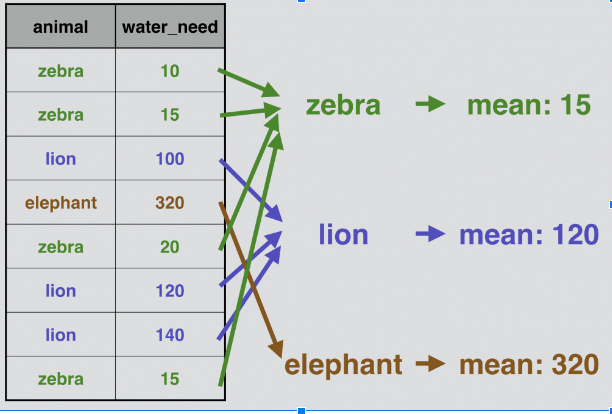

It is just grouping similar values, and calculating the given aggregate value (in the above example it was a mean value) for each group.





**Example 6 - Pandas groupby() – in action**

- Let’s perform the above-presented grouping and aggregation for real, on our zoo DataFrame!

- Use the statement below:



In [15]:
zoo.groupby('animal').mean()

,uniq_id,water_need
animal,,
elephant,1002.0,550.000000
kangaroo,1021.0,416.666667
lion,1017.5,477.500000
tiger,1006.0,310.000000
zebra,1012.0,184.285714


Just as before, Pandas automatically runs the .mean() calculation for every column (the animal column disappeared since that was the column we grouped by). You can either ignore the uniq_id column or you can remove it afterward by using one of these syntaxes:




In [16]:
zoo.groupby('animal').mean()[['water_need']]
# –» This returns a DataFrame object.

,water_need
animal,
elephant,550.000000
kangaroo,416.666667
lion,477.500000
tiger,310.000000
zebra,184.285714


Alternate way:

In [17]:
zoo.groupby('animal').mean().water_need
# –» This returns a Series object.

animal
elephant    550.000000
kangaroo    416.666667
lion        477.500000
tiger       310.000000
zebra       184.285714
Name: water_need, dtype: float64

Obviously, you can change the aggregation method from .mean() to anything, as we learned above!


**Example 7 - Pandas groupby() and count()**

Let’s see one more example, and combine Pandas groupby() and count() methods.

I just wanted to add this example because it is the most common operation you will perform when you discover a new dataset. Using count() and groupby() together is just as simple as the previous example.


Just use the below statement.



In [18]:
zoo.groupby('animal').count()

,uniq_id,water_need
animal,,
elephant,3,3
kangaroo,3,3
lion,4,4
tiger,5,5
zebra,7,7


And magically. the different animals are counted by Pandas:
